In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
%matplotlib inline
import itertools
import warnings
plt.style.use('ggplot')

This (p) is called the lag order. It represents the number of prior lag observations we include in the model i.e. 
the number of lags which have a significant correlation with the current observation.

(q) represents the size of the moving window i.e. the number of lag observation errors which have a significant impact 
on the current observation. Its similar to the lag order(p), but it considers errors instead of the observations themselves.

This order of differencing (d) is an important parameter of ARIMA and determines the success of the model.

In [2]:
#Import data from CSV
data = pd.read_csv('data.csv')
foo = data[['date', 'T1']]
t1 = foo[:int(0.85*len(foo['T1']))]
t1.head()
print(int(0.85*len(foo['T1'])))
print(len(foo['T1']))

16774
19735


<Figure size 864x360 with 0 Axes>

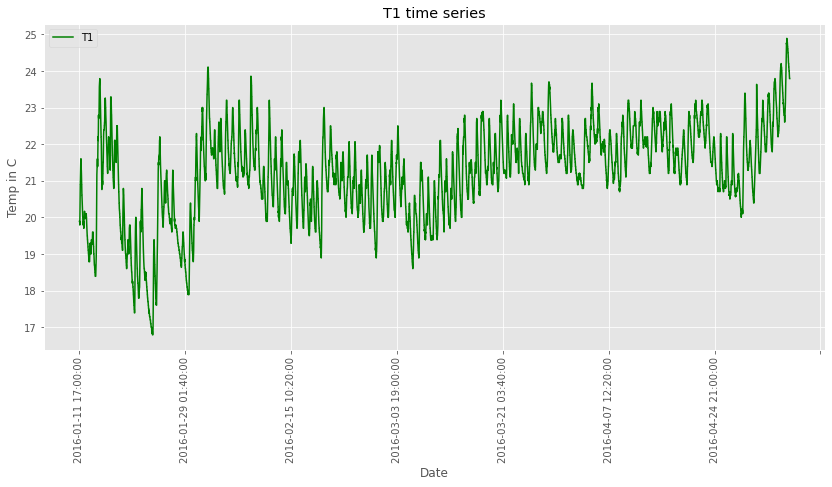

In [3]:
#Visualize net electricity generation from coal since 1973
plt.figure(figsize=[12, 5]); # Set dimensions for figure
t1.plot(x='date', y='T1', figsize = (14, 6), legend = True, color='g')
plt.title('T1 time series')
plt.ylabel('Temp in C')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [4]:
ad_fuller_result = adfuller(t1['T1'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
for key,value in ad_fuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -9.954480722456037
p-value: 2.464897997657875e-17
Critial Values:
   1%, -3.430740116405322
Critial Values:
   5%, -2.8617124159076894
Critial Values:
   10%, -2.5668617725947778


In [5]:
t1['T1 First Difference'] = t1['T1'] - t1['T1'].shift(1)
t1.dropna(subset = ["T1 First Difference"], inplace=True)
t1.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_13220/910383637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['T1 First Difference'] = t1['T1'] - t1['T1'].shift(1)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,T1,T1 First Difference
1,2016-01-11 17:10:00,19.89,0.0
2,2016-01-11 17:20:00,19.89,0.0
3,2016-01-11 17:30:00,19.89,0.0
4,2016-01-11 17:40:00,19.89,0.0
5,2016-01-11 17:50:00,19.89,0.0


<Figure size 864x360 with 0 Axes>

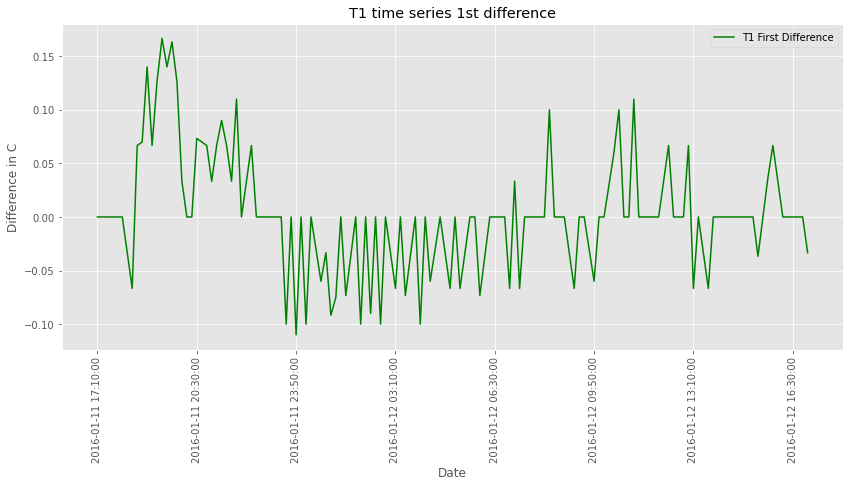

In [6]:
#Visualize net electricity generation from coal since 1973
plt.figure(figsize=[12, 5]); # Set dimensions for figure
t1[:144].plot(x='date', y='T1 First Difference', figsize = (14, 6), legend = True, color='g')
plt.title('T1 time series 1st difference')
plt.ylabel('Difference in C')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [7]:
ad_fuller_result = adfuller(t1['T1'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
for key,value in ad_fuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -9.936839677055401
p-value: 2.7294341485918403e-17
Critial Values:
   1%, -3.4307401396799677
Critial Values:
   5%, -2.86171242619348
Critial Values:
   10%, -2.566861778069759


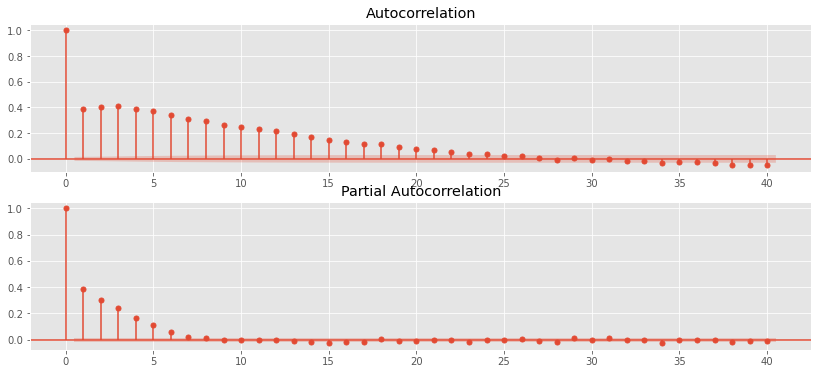

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t1['T1 First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(t1['T1 First Difference'].dropna(),lags=40,ax=ax2)

In [9]:
import pmdarima as pm
bar = pd.read_csv('data.csv',index_col=0)
bar = bar[['T1']]
bar.index = pd.to_datetime(bar.index)
bar.head()
foobar = bar[:144]

stepwise_model = pm.auto_arima(foobar, start_p=1, start_q=1,
                           max_p=8, max_q=8, m=144,
                           start_P=0, seasonal=False,
                           max_d=5, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\Users\Admin\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (144) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-486.483, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-426.135, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-461.365, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-443.945, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-428.029, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-489.494, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-487.618, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-487.744, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-487.563, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-489.176, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-489.745, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-487.746, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-485.745, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-491.734, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [10]:
best_model = SARIMAX(t1['T1'][:144], order=(3, 1, 0), seasonal_order=(0, 0, 0, 0)).fit(dis=-1)
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                     T1   No. Observations:                  144
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 249.554
Date:                Tue, 08 Feb 2022   AIC                           -491.107
Time:                        13:37:12   BIC                           -479.256
Sample:                             0   HQIC                          -486.291
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2020      0.078      2.586      0.010       0.049       0.355
ar.L2          0.3733      0.074      5.041      0.000       0.228       0.518
ar.L3          0.1678      0.069      2.429      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


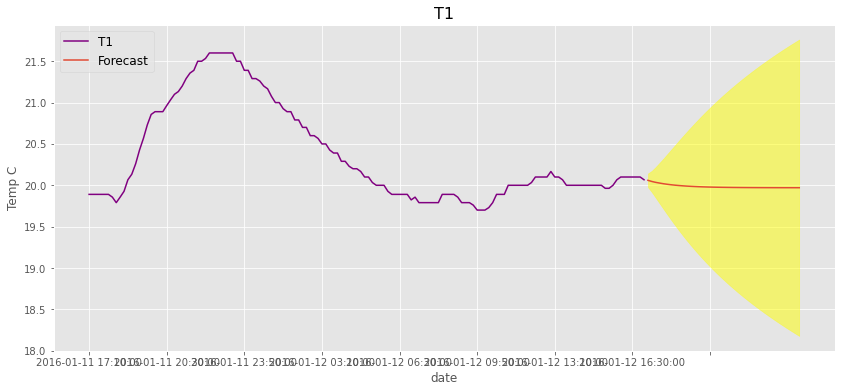

In [13]:
#Forecasting x steps ahead
forecast_values = best_model.get_forecast(steps = 40)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = t1[:144].plot(x='date', y='T1', figsize = (14, 6), legend = True, color='purple')

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (14, 6), grid=True)

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .5)
plt.title('T1', size = 16)
plt.ylabel('Temp C', size=12)
plt.legend(loc='upper left', prop={'size': 12})
ax.axes.get_xaxis().set_visible(True)
#annotation
#ax.text(540, 400, 'Forecasted Values ', fontsize=12,  color='red')
plt.show()